<img src="../media/LandingPage-Header-RED-CENTRE.jpg" alt="Notebook Banner" style="width:60%; height:auto; display:block; margin-left:auto; margin-right:auto;">

## Exercise: Lets do the following analysis, **Which EU countries have more sales?**

First lets look at the Pagila ER:

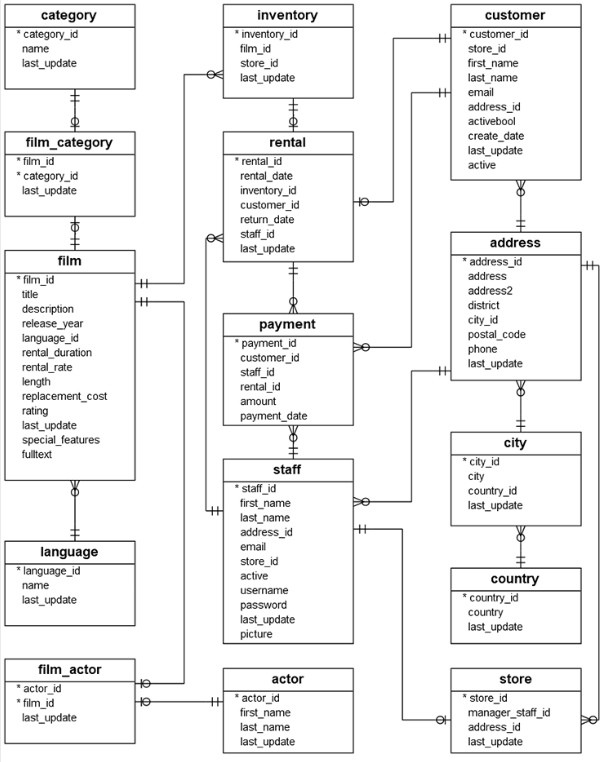

Using the tables below complete the exercise.

Make sure to extract from PostgreSQL the following tables :
- `payment.csv`
- `customer.csv`
- `address.csv`
- `city.csv`
- `country.csv`


In [2]:
import pandas as pd
import psycopg2 as psycopg2
import pandas as pd
import sys
import os

# Add the parent directory to sys.path
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.insert(0, parent_dir)

# Now you can import config.py
import config

# Use the config values
print(config.DB_USER)

coh_22


In [1]:
# Parameters and extraction of one table "payments"
db_params = {
    "user": config.DB_USER,
    "password": config.DB_PASSWORD,
    "host": config.DB_HOST,
    "port": config.DB_PORT,
    "database": 'pagila'
}

db_params

NameError: name 'config' is not defined

In [ ]:
# Extracting "payments"
        

,payment_id,customer_id,staff_id,rental_id,amount,payment_date
0,16050,269,2,7,1.99,2007-01-24 21:40:19.996577
1,16051,269,1,98,0.99,2007-01-25 15:16:50.996577
2,16052,269,2,678,6.99,2007-01-28 21:44:14.996577
3,16053,269,2,703,0.99,2007-01-29 00:58:02.996577
4,16054,269,1,750,4.99,2007-01-29 08:10:06.996577


In [ ]:
# Extracting "customer"


,customer_id,store_id,first_name,last_name,email,address_id,activebool,create_date,last_update,active
0,1,1,MARY,SMITH,MARY.SMITH@sakilacustomer.org,5,True,2006-02-14,2006-02-15 09:57:20,1
1,2,1,PATRICIA,JOHNSON,PATRICIA.JOHNSON@sakilacustomer.org,6,True,2006-02-14,2006-02-15 09:57:20,1
2,3,1,LINDA,WILLIAMS,LINDA.WILLIAMS@sakilacustomer.org,7,True,2006-02-14,2006-02-15 09:57:20,1
3,4,2,BARBARA,JONES,BARBARA.JONES@sakilacustomer.org,8,True,2006-02-14,2006-02-15 09:57:20,1
4,5,1,ELIZABETH,BROWN,ELIZABETH.BROWN@sakilacustomer.org,9,True,2006-02-14,2006-02-15 09:57:20,1


In [ ]:
# Extracting "address"


,address_id,address,address2,district,city_id,postal_code,phone,last_update
0,1,47 MySakila Drive,None,Alberta,300,,,2006-02-15 09:45:30
1,2,28 MySQL Boulevard,None,QLD,576,,,2006-02-15 09:45:30
2,3,23 Workhaven Lane,None,Alberta,300,,14033335568,2006-02-15 09:45:30
3,4,1411 Lillydale Drive,None,QLD,576,,6172235589,2006-02-15 09:45:30
4,5,1913 Hanoi Way,,Nagasaki,463,35200,28303384290,2006-02-15 09:45:30


In [ ]:
# Extracting "city"


,city_id,city,country_id,last_update
0,1,A Corua (La Corua),87,2006-02-15 09:45:25
1,2,Abha,82,2006-02-15 09:45:25
2,3,Abu Dhabi,101,2006-02-15 09:45:25
3,4,Acua,60,2006-02-15 09:45:25
4,5,Adana,97,2006-02-15 09:45:25


In [ ]:
##If the connection to the database failed, then load the files from csv files.

#payment = pd.read_csv('../DataSources/payment.csv') 
#customer = pd.read_csv('../DataSources/customer.csv')
#address = pd.read_csv('../DataSources/address.csv')
#city = pd.read_csv('../DataSources/city.csv')
#country = pd.read_csv('../DataSources/country.csv')

You may wish to explore the data added before answering the questions below.

1. Create a dataframe called `customer_payments` which finds the total spent by each customer.

,amount
customer_id,
1,118.68
2,128.73
3,135.74
4,81.78
5,144.62


2. Rename the `amount` column to ``total_amount``.

,total_amount
customer_id,
1,118.68
2,128.73
3,135.74
4,81.78
5,144.62
...,...
595,117.70
596,96.72
597,99.75


3. Merge the `customer_payment` dataframe with `customer`. Call it `customer_payment_details`.

,customer_id,total_amount,store_id,first_name,last_name,email,address_id,activebool,create_date,last_update,active
0,1,118.68,1,MARY,SMITH,MARY.SMITH@sakilacustomer.org,5,True,2006-02-14,2006-02-15 09:57:20,1
1,2,128.73,1,PATRICIA,JOHNSON,PATRICIA.JOHNSON@sakilacustomer.org,6,True,2006-02-14,2006-02-15 09:57:20,1
2,3,135.74,1,LINDA,WILLIAMS,LINDA.WILLIAMS@sakilacustomer.org,7,True,2006-02-14,2006-02-15 09:57:20,1
3,4,81.78,2,BARBARA,JONES,BARBARA.JONES@sakilacustomer.org,8,True,2006-02-14,2006-02-15 09:57:20,1
4,5,144.62,1,ELIZABETH,BROWN,ELIZABETH.BROWN@sakilacustomer.org,9,True,2006-02-14,2006-02-15 09:57:20,1


Let's have a look at the other tables we have.

In [ ]:
address.head()

,address_id,address,address2,district,city_id,postal_code,phone,last_update
0,1,47 MySakila Drive,NaN,Alberta,300,NaN,NaN,2006-02-15 09:45:30
1,2,28 MySQL Boulevard,NaN,QLD,576,NaN,NaN,2006-02-15 09:45:30
2,3,23 Workhaven Lane,NaN,Alberta,300,NaN,1.403334e+10,2006-02-15 09:45:30
3,4,1411 Lillydale Drive,NaN,QLD,576,NaN,6.172236e+09,2006-02-15 09:45:30
4,5,1913 Hanoi Way,NaN,Nagasaki,463,35200.0,2.830338e+10,2006-02-15 09:45:30


In [ ]:
city.head()

,city_id,city,country_id,last_update
0,1,A Corua (La Corua),87,2006-02-15 09:45:25
1,2,Abha,82,2006-02-15 09:45:25
2,3,Abu Dhabi,101,2006-02-15 09:45:25
3,4,Acua,60,2006-02-15 09:45:25
4,5,Adana,97,2006-02-15 09:45:25


In [ ]:
country.head()

,country_id,country,last_update
0,1,Afghanistan,2006-02-15 09:44:00
1,2,Algeria,2006-02-15 09:44:00
2,3,American Samoa,2006-02-15 09:44:00
3,4,Angola,2006-02-15 09:44:00
4,5,Anguilla,2006-02-15 09:44:00


4. Merge the `country` to the `cities` data. Call it `cities and country`.

,city_id,city,country_id,last_update_x,country,last_update_y
0,1,A Corua (La Corua),87,2006-02-15 09:45:25,Spain,2006-02-15 09:44:00
1,2,Abha,82,2006-02-15 09:45:25,Saudi Arabia,2006-02-15 09:44:00
2,3,Abu Dhabi,101,2006-02-15 09:45:25,United Arab Emirates,2006-02-15 09:44:00
3,4,Acua,60,2006-02-15 09:45:25,Mexico,2006-02-15 09:44:00
4,5,Adana,97,2006-02-15 09:45:25,Turkey,2006-02-15 09:44:00


5. Merge the `city_and_country` to the `address` data. Call it `address_city_and_country`.

,address_id,address,address2,district,city_id,postal_code,phone,last_update,city,country_id,last_update_x,country,last_update_y
0,1,47 MySakila Drive,NaN,Alberta,300,NaN,NaN,2006-02-15 09:45:30,Lethbridge,20,2006-02-15 09:45:25,Canada,2006-02-15 09:44:00
1,2,28 MySQL Boulevard,NaN,QLD,576,NaN,NaN,2006-02-15 09:45:30,Woodridge,8,2006-02-15 09:45:25,Australia,2006-02-15 09:44:00
2,3,23 Workhaven Lane,NaN,Alberta,300,NaN,1.403334e+10,2006-02-15 09:45:30,Lethbridge,20,2006-02-15 09:45:25,Canada,2006-02-15 09:44:00
3,4,1411 Lillydale Drive,NaN,QLD,576,NaN,6.172236e+09,2006-02-15 09:45:30,Woodridge,8,2006-02-15 09:45:25,Australia,2006-02-15 09:44:00
4,5,1913 Hanoi Way,NaN,Nagasaki,463,35200.0,2.830338e+10,2006-02-15 09:45:30,Sasebo,50,2006-02-15 09:45:25,Japan,2006-02-15 09:44:00


6. Merge the `address_city_and_country` to the `customer_payment_details` data. Call it `customer_payment_full_details`.

In [ ]:
# To avoid error with too many columns called 'last_update'
customer_payments_details.drop(columns='last_update', axis=1, inplace=True)

,customer_id,total_amount,store_id,first_name,last_name,email,address_id,activebool,create_date,active,...,district,city_id,postal_code,phone,last_update,city,country_id,last_update_x,country,last_update_y
0,1,118.68,1,MARY,SMITH,MARY.SMITH@sakilacustomer.org,5,True,2006-02-14,1,...,Nagasaki,463,35200.0,2.830338e+10,2006-02-15 09:45:30,Sasebo,50,2006-02-15 09:45:25,Japan,2006-02-15 09:44:00
1,2,128.73,1,PATRICIA,JOHNSON,PATRICIA.JOHNSON@sakilacustomer.org,6,True,2006-02-14,1,...,California,449,17886.0,8.386353e+11,2006-02-15 09:45:30,San Bernardino,103,2006-02-15 09:45:25,United States,2006-02-15 09:44:00
2,3,135.74,1,LINDA,WILLIAMS,LINDA.WILLIAMS@sakilacustomer.org,7,True,2006-02-14,1,...,Attika,38,83579.0,4.484772e+11,2006-02-15 09:45:30,Athenai,39,2006-02-15 09:45:25,Greece,2006-02-15 09:44:00
3,4,81.78,2,BARBARA,JONES,BARBARA.JONES@sakilacustomer.org,8,True,2006-02-14,1,...,Mandalay,349,53561.0,7.058140e+11,2006-02-15 09:45:30,Myingyan,64,2006-02-15 09:45:25,Myanmar,2006-02-15 09:44:00
4,5,144.62,1,ELIZABETH,BROWN,ELIZABETH.BROWN@sakilacustomer.org,9,True,2006-02-14,1,...,Nantou,361,42399.0,1.065565e+10,2006-02-15 09:45:30,Nantou,92,2006-02-15 09:45:25,Taiwan,2006-02-15 09:44:00


We don't want most of these columns, so lets only keep the ones we need. To do that, it helps to know which ones there are.

In [ ]:
customer_payment_full_details.columns

Index(['customer_id', 'total_amount', 'store_id', 'first_name', 'last_name',
       'email', 'address_id', 'activebool', 'create_date', 'active', 'address',
       'address2', 'district', 'city_id', 'postal_code', 'phone',
       'last_update', 'city', 'country_id', 'last_update_x', 'country',
       'last_update_y'],
      dtype='object')

7. Filter the columns relevant to the analysis.

,customer_id,total_amount,country
0,1,118.68,Japan
1,2,128.73,United States
2,3,135.74,Greece
3,4,81.78,Myanmar
4,5,144.62,Taiwan
...,...,...,...
594,595,117.70,China
595,596,96.72,Greece
596,597,99.75,Peru
597,598,83.78,Switzerland


8. Group the sales per country.

,country,total_amount
0,Afghanistan,67.82
1,American Samoa,71.80
2,Lithuania,73.76
3,Tonga,73.82
4,Tunisia,78.77


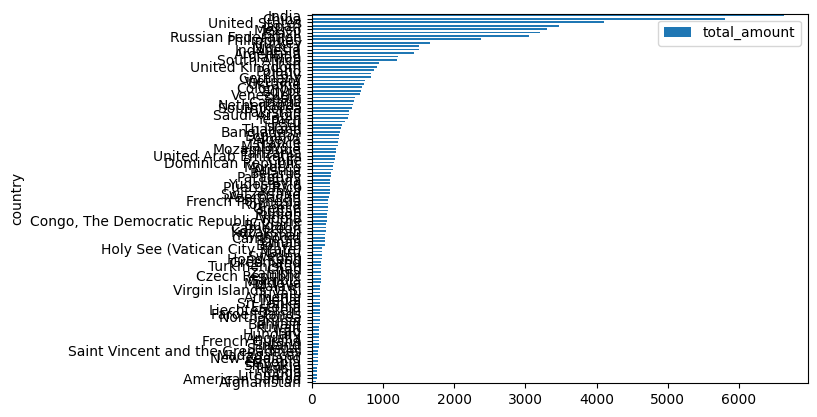

In [ ]:
# Looking at the distribution of sales
sales_per_country.plot.barh(x='country', y='total_amount');

9. Filter the data to select EU countries

In [ ]:
sales_per_country.country.unique()

array(['Afghanistan', 'American Samoa', 'Lithuania', 'Tonga', 'Tunisia',
       'Slovakia', 'Ethiopia', 'New Zealand', 'Madagascar',
       'Saint Vincent and the Grenadines', 'Senegal', 'Finland',
       'French Guiana', 'Anguilla', 'Hungary', 'Iraq', 'Kuwait',
       'Bahrain', 'Brunei', 'North Korea', 'Faroe Islands',
       'Liechtenstein', 'Estonia', 'Sri Lanka', 'Nepal', 'Armenia',
       'Tuvalu', 'Virgin Islands, U.S.', 'Malawi', 'Moldova', 'Gambia',
       'Czech Republic', 'Zambia', 'Chad', 'Turkmenistan', 'Greenland',
       'Hong Kong', 'Sweden', 'Nauru', 'Holy See (Vatican City State)',
       'Bolivia', 'Oman', 'Cambodia', 'Myanmar', 'Kazakstan', 'Cameroon',
       'Bulgaria', 'Congo, The Democratic Republic of the', 'Angola',
       'Runion', 'Sudan', 'Greece', 'Romania', 'French Polynesia',
       'Azerbaijan', 'Switzerland', 'Kenya', 'Puerto Rico', 'Yugoslavia',
       'Latvia', 'Paraguay', 'Belarus', 'Austria', 'Morocco',
       'Dominican Republic', 'Chile', 'United 

In [ ]:
# Don't worry, I have a list of EU countries for you to filter with:
eu_countries = ['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France',
                'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands',
                'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden']

In [ ]:
# Filtering the data to select the EU countries:


,country,total_amount
2,Lithuania,73.76
5,Slovakia,89.74
11,Finland,101.74
14,Hungary,111.71
22,Estonia,115.70
31,Czech Republic,133.71
37,Sweden,144.66
46,Bulgaria,204.50
51,Greece,232.46
52,Romania,235.38


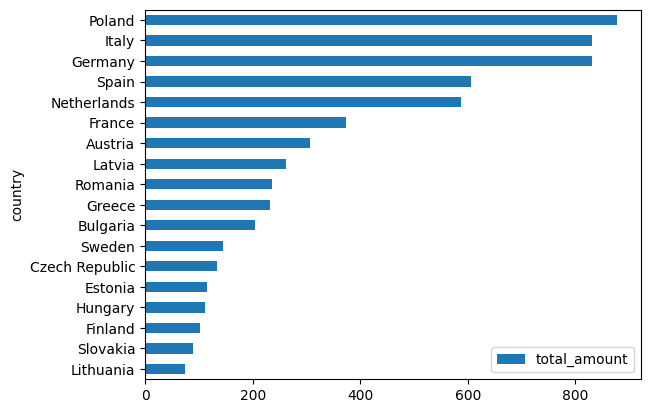

In [ ]:
# Looking now to the bar plot per country:
sales_per_eu_country.plot.barh(x='country', y='total_amount');

10. Export the EU Sales per Country to a csv file.